In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
weatherDate = pd.read_csv('Downloads/WCinWWT/Summary of Weather.csv')
weatherDate

/tmp/ipykernel_19006/2932214006.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weatherDate = pd.read_csv('Downloads/WCinWWT/Summary of Weather.csv')


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# convert all T values in Precip column to zero, based on the above information
weatherDate['Precip'] = weatherDate['Precip'].replace('T', 0)
weatherDate

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# as instructed in problem, replace all of NaN values with 0
weatherDate = weatherDate.fillna(0)
weatherDate

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,0.0,25.555556,22.222222,23.888889,0.0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,10001,1942-7-2,0,0.0,28.888889,21.666667,25.555556,0.0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,10001,1942-7-3,2.54,0.0,26.111111,22.222222,24.444444,0.0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,10001,1942-7-4,2.54,0.0,26.666667,22.222222,24.444444,0.0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,10001,1942-7-5,0,0.0,26.666667,21.666667,24.444444,0.0,0,42,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,0.0,28.333333,18.333333,23.333333,0.0,0,45,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
119036,82506,1945-12-28,9.906,0.0,29.444444,18.333333,23.888889,0.0,1.0,45,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
119037,82506,1945-12-29,0,0.0,28.333333,18.333333,23.333333,0.0,1.0,45,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
119038,82506,1945-12-30,0,0.0,28.333333,18.333333,23.333333,0.0,0,45,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


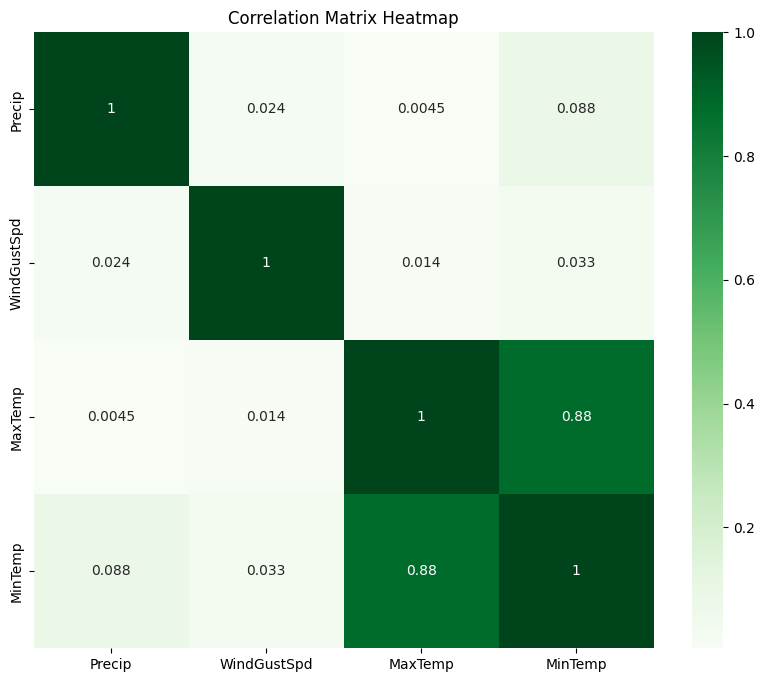

In [23]:
twoToFiveDf = weatherDate.iloc[:, 2:6]
corr = twoToFiveDf.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="Greens", annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Text(0, 0.5, 'MinTemp')

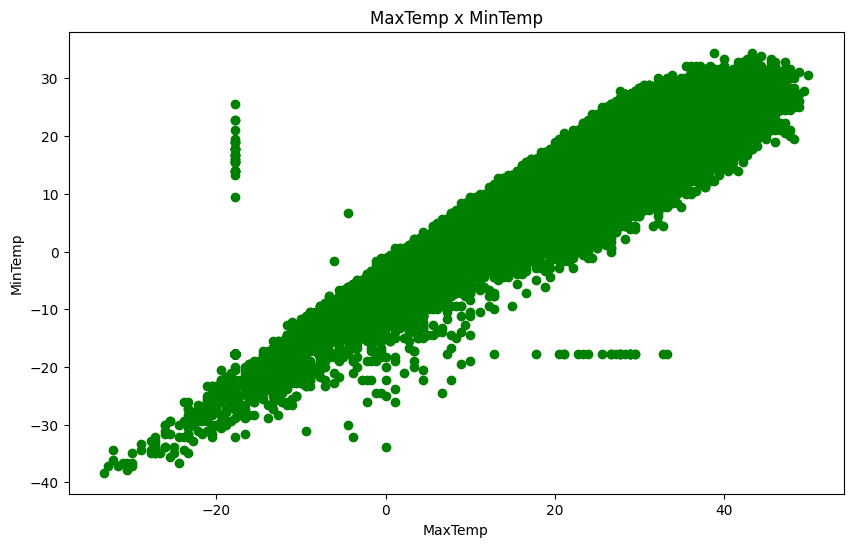

In [6]:
plt.figure(figsize=(10, 6))
x = weatherDate['MaxTemp']
y = weatherDate['MinTemp']
plt.scatter(x, y, color='Green')
plt.title('MaxTemp x MinTemp')
plt.xlabel('MaxTemp')
plt.ylabel('MinTemp')

In [7]:
learning_rate = 0.001
iterations = 3000
w = 0
b = 0
n = len(x)
y_pred_list = []

for _ in range(iterations):
  y_pred = np.dot(x, w) + b
  dw = (-2/n) * np.sum(np.multiply(x, (y - y_pred)))
  db = (-2/n) * np.sum(y - y_pred)
  w = w - learning_rate * dw
  b = b - learning_rate * db
  y_pred_list.append(y_pred)

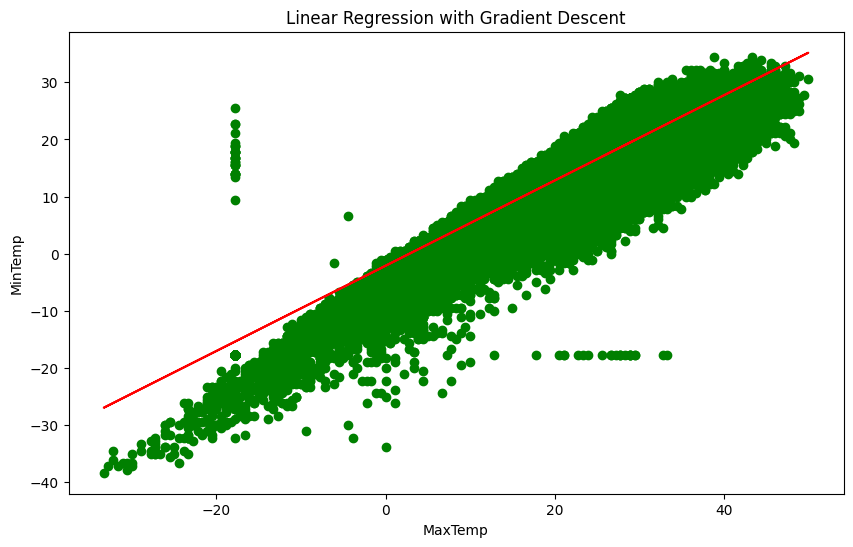

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='green')
plt.plot(x, w * x + b, color='red')
plt.xlabel('MaxTemp')
plt.ylabel('MinTemp')
plt.title('Linear Regression with Gradient Descent')
plt.show()

In [16]:
# y_pred = w * x + b
def MAE_error(y, y_pred_list):
    y = np.array(y)
    y_pred = np.array(y_pred_list)
    return float(np.mean(np.abs(y - y_pred)))
    
mae = MAE_error(y, y_pred_list)
print(mae)

3.2467087494264892


In [10]:
# now we use sklearn built-in functions:

In [19]:
x_array = np.array(x)
X = x_array.reshape(-1, 1)  # Reshape x from 1D to 2D

# Create and Fit the Model
model = LinearRegression()
model.fit(X, y)
y_pred2 = model.predict(X)

/tmp/ipykernel_19006/2604069161.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


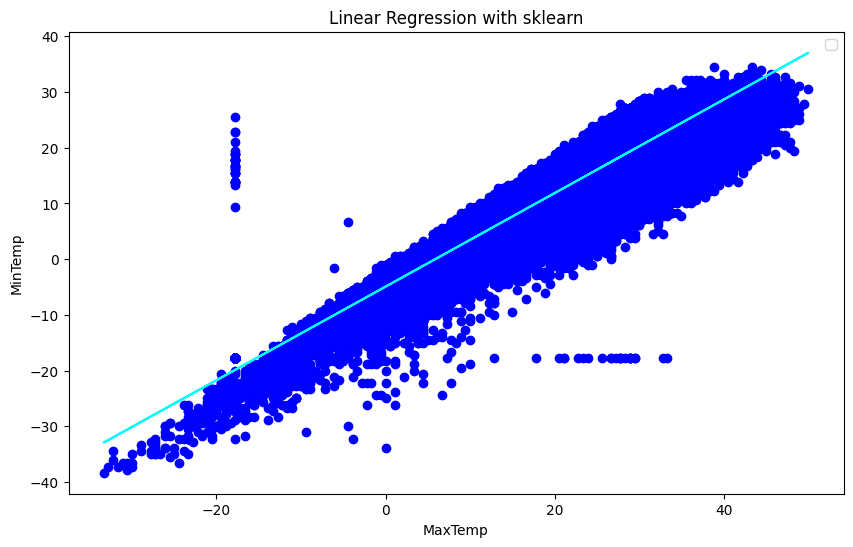

In [20]:
# Plot the Results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue') 
plt.plot(x, y_pred2, color='cyan') 
plt.xlabel('MaxTemp')
plt.ylabel('MinTemp')
plt.title('Linear Regression with sklearn')
plt.legend()
plt.show()

In [21]:
mae = MAE_error(y, y_pred2)
print(mae)

3.1114015366117855


In [13]:
# combining two plots:

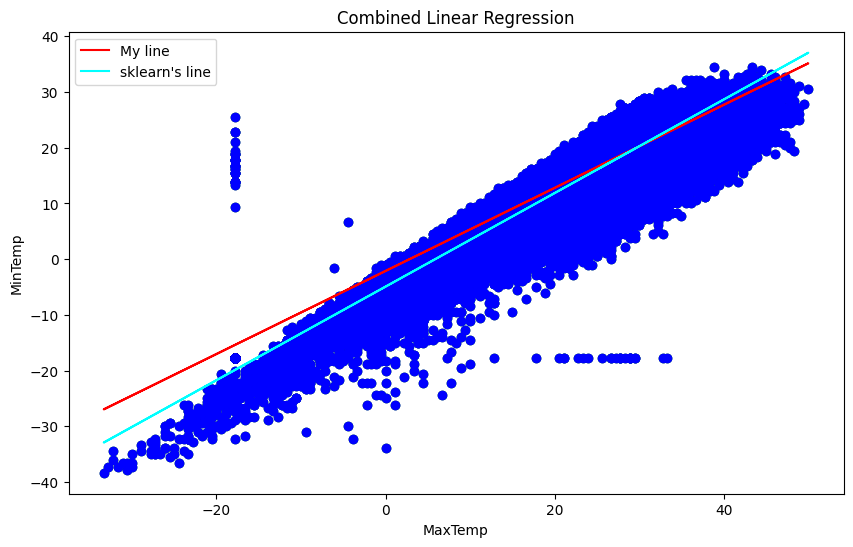

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='green')
plt.plot(x, w * x + b, color='red', label='My line')
plt.scatter(x, y, color='blue')  
plt.plot(x, y_pred2, color='cyan', label='sklearn\'s line')
plt.xlabel('MaxTemp')
plt.ylabel('MinTemp')
plt.title('Combined Linear Regression')
plt.legend()
plt.show()